# ch05.09. 사이킷런 실습 - 회귀분석

---
* 날짜:2022.05.20
* 이름: 윤태우

## 학습내용
    - 사이킷런을 이용해 여러가지 회귀 모델을 사용한다.
    - 회귀 성능 지표에 대해 이해한다.
    - 회귀 분석 결과를 시각화 한다.

```
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
```

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def housing_loader(cols=[], norm=True):
  from sklearn.preprocessing import StandardScaler
  from sklearn.model_selection import train_test_split
  import warnings
  warnings.filterwarnings('ignore')

  cols, norm = False, True
  
  df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

  df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
                'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
  print(df.shape)

  if cols:
    X = df[cols].values
  else:
    X = df.drop(['MEDV'], axis=1)
  y = df['MEDV'].values

  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

  if norm:
    sc_x = StandardScaler()
    sc_y = StandardScaler()
    # 스케일링 파라미터 (평균, 분산) -> 트레이닝 셋
    # 적용 -> 트레이닝, 테스트
    # fit : 학습 (파라미터 찾기)
    # fit_transform : 학습과 동시에 파라미터 적용(데이터 변환)
    # transform : 파라미터 적용

    # 트레이닝셋 : 학습 + 변환
    
    # 트레이닝셋 fit으로 학습 파라미터 찾기 -> transform으로 파라미터 적용한 트레이닝셋 나타냄
    sc_x.fit(X_train)
    sc_y.fit( np.expand_dims(y_train, 1) )

    X_train = sc_x.transform(X_train)
    y_train = sc_y.transform( np.expand_dims(y_train, 1) ).flatten()
    X_test = sc_x.transform(X_test)
    y_test = sc_y.transform( np.expand_dims(y_test, 1) ).flatten()

    # 이렇게 그냥 fit_transform으로 한번에 학습된 파라미터가 적용된 트레이닝셋을 나타내도됨.
    # X_train = sc_x.fit_transform(X_train)
    # y_train = sc_y.fit_transform( np.expand_dims(y_train, 1) ).flatten()
    # X_test = sc_x.transform(X_test)
    # y_test = sc_y.transform( np.expand_dims(y_test, 1) ).flatten()
  
  
  return X_train, X_test, y_train, y_test

(506, 14)


## 단순 회귀 분석
---

### **| 데이터 처리**



#### **주택 데이터 EDA**

[https://archive.ics.uci.edu/ml/datasets/Housing](https://archive.ics.uci.edu/ml/datasets/Housing)

    
<pre>
01. CRIM     도시의 인당 범죄율
02. ZN       2만 5,0000평방 피트가 넘는 주택 비율
03. INDUS    도시에서 소매 업종이 아닌 지역 비율
04. CHAS     찰스 강 인접 여부(강 주변=1, 그외=0)
05. NOX      일산화질소 농도(10ppm당)
06. RM       주택의 평균 방 개수
07. AGE      1940년 이전에 지어진 자가 주택 비율
08. DIS      다섯 개의 보스턴 고용 센터까지 가중치가 적용된 거리
09. RAD      방사형으로 뻗은 고속도로까지 접근성 지수
10. TAX      10만 달러당 재산세율
11. PTRATIO  도시의 학생-교사 비율
12. B        1000(Bk - 0.63)^2 도시의 아프리카계 미국인 비율
13. LSTAT    저소득층 비율
14. MEDV     자가 주택의 중간가격 (단위 $1000s)
</pre>

```
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
```

* 데이터 불러오기 및 기본 shape 확인

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')
print(df.shape)
df.head()

(506, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


* 각 속성별 기본 정보 확인

In [ ]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


* 속성별 고유값 확인

In [ ]:
# 모든 컬럼에 대해서
for col in df.columns :
  print( col, len(df[col].unique()) )  # 각 피쳐의 고유값 개수

CRIM 504
ZN 26
INDUS 76
CHAS 2
NOX 81
RM 446
AGE 356
DIS 412
RAD 9
TAX 66
PTRATIO 46
B 357
LSTAT 455
MEDV 229


* 속성별 분포 시각화

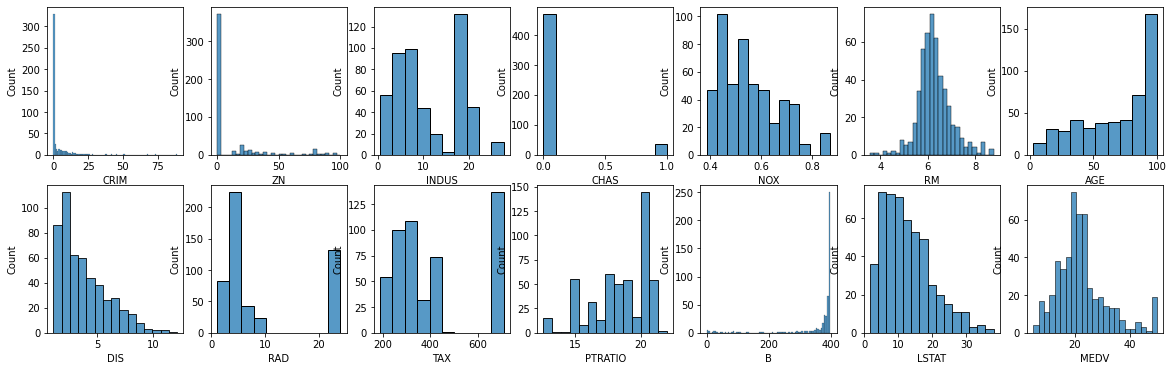

In [ ]:
fig, axes = plt.subplots(2,7, figsize = (20,6))
axes = axes.flatten()
for col, ax in zip(df.columns, axes) :
  sns.histplot(data=df, x = col, ax = ax)

* 속성간 상관계수 시각화

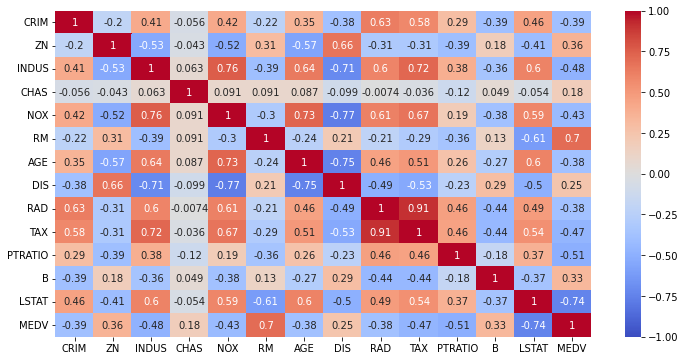

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), annot = True, vmax = 1, vmin = -1, cmap = 'coolwarm')

* 모든 속성간 산점도 그리기

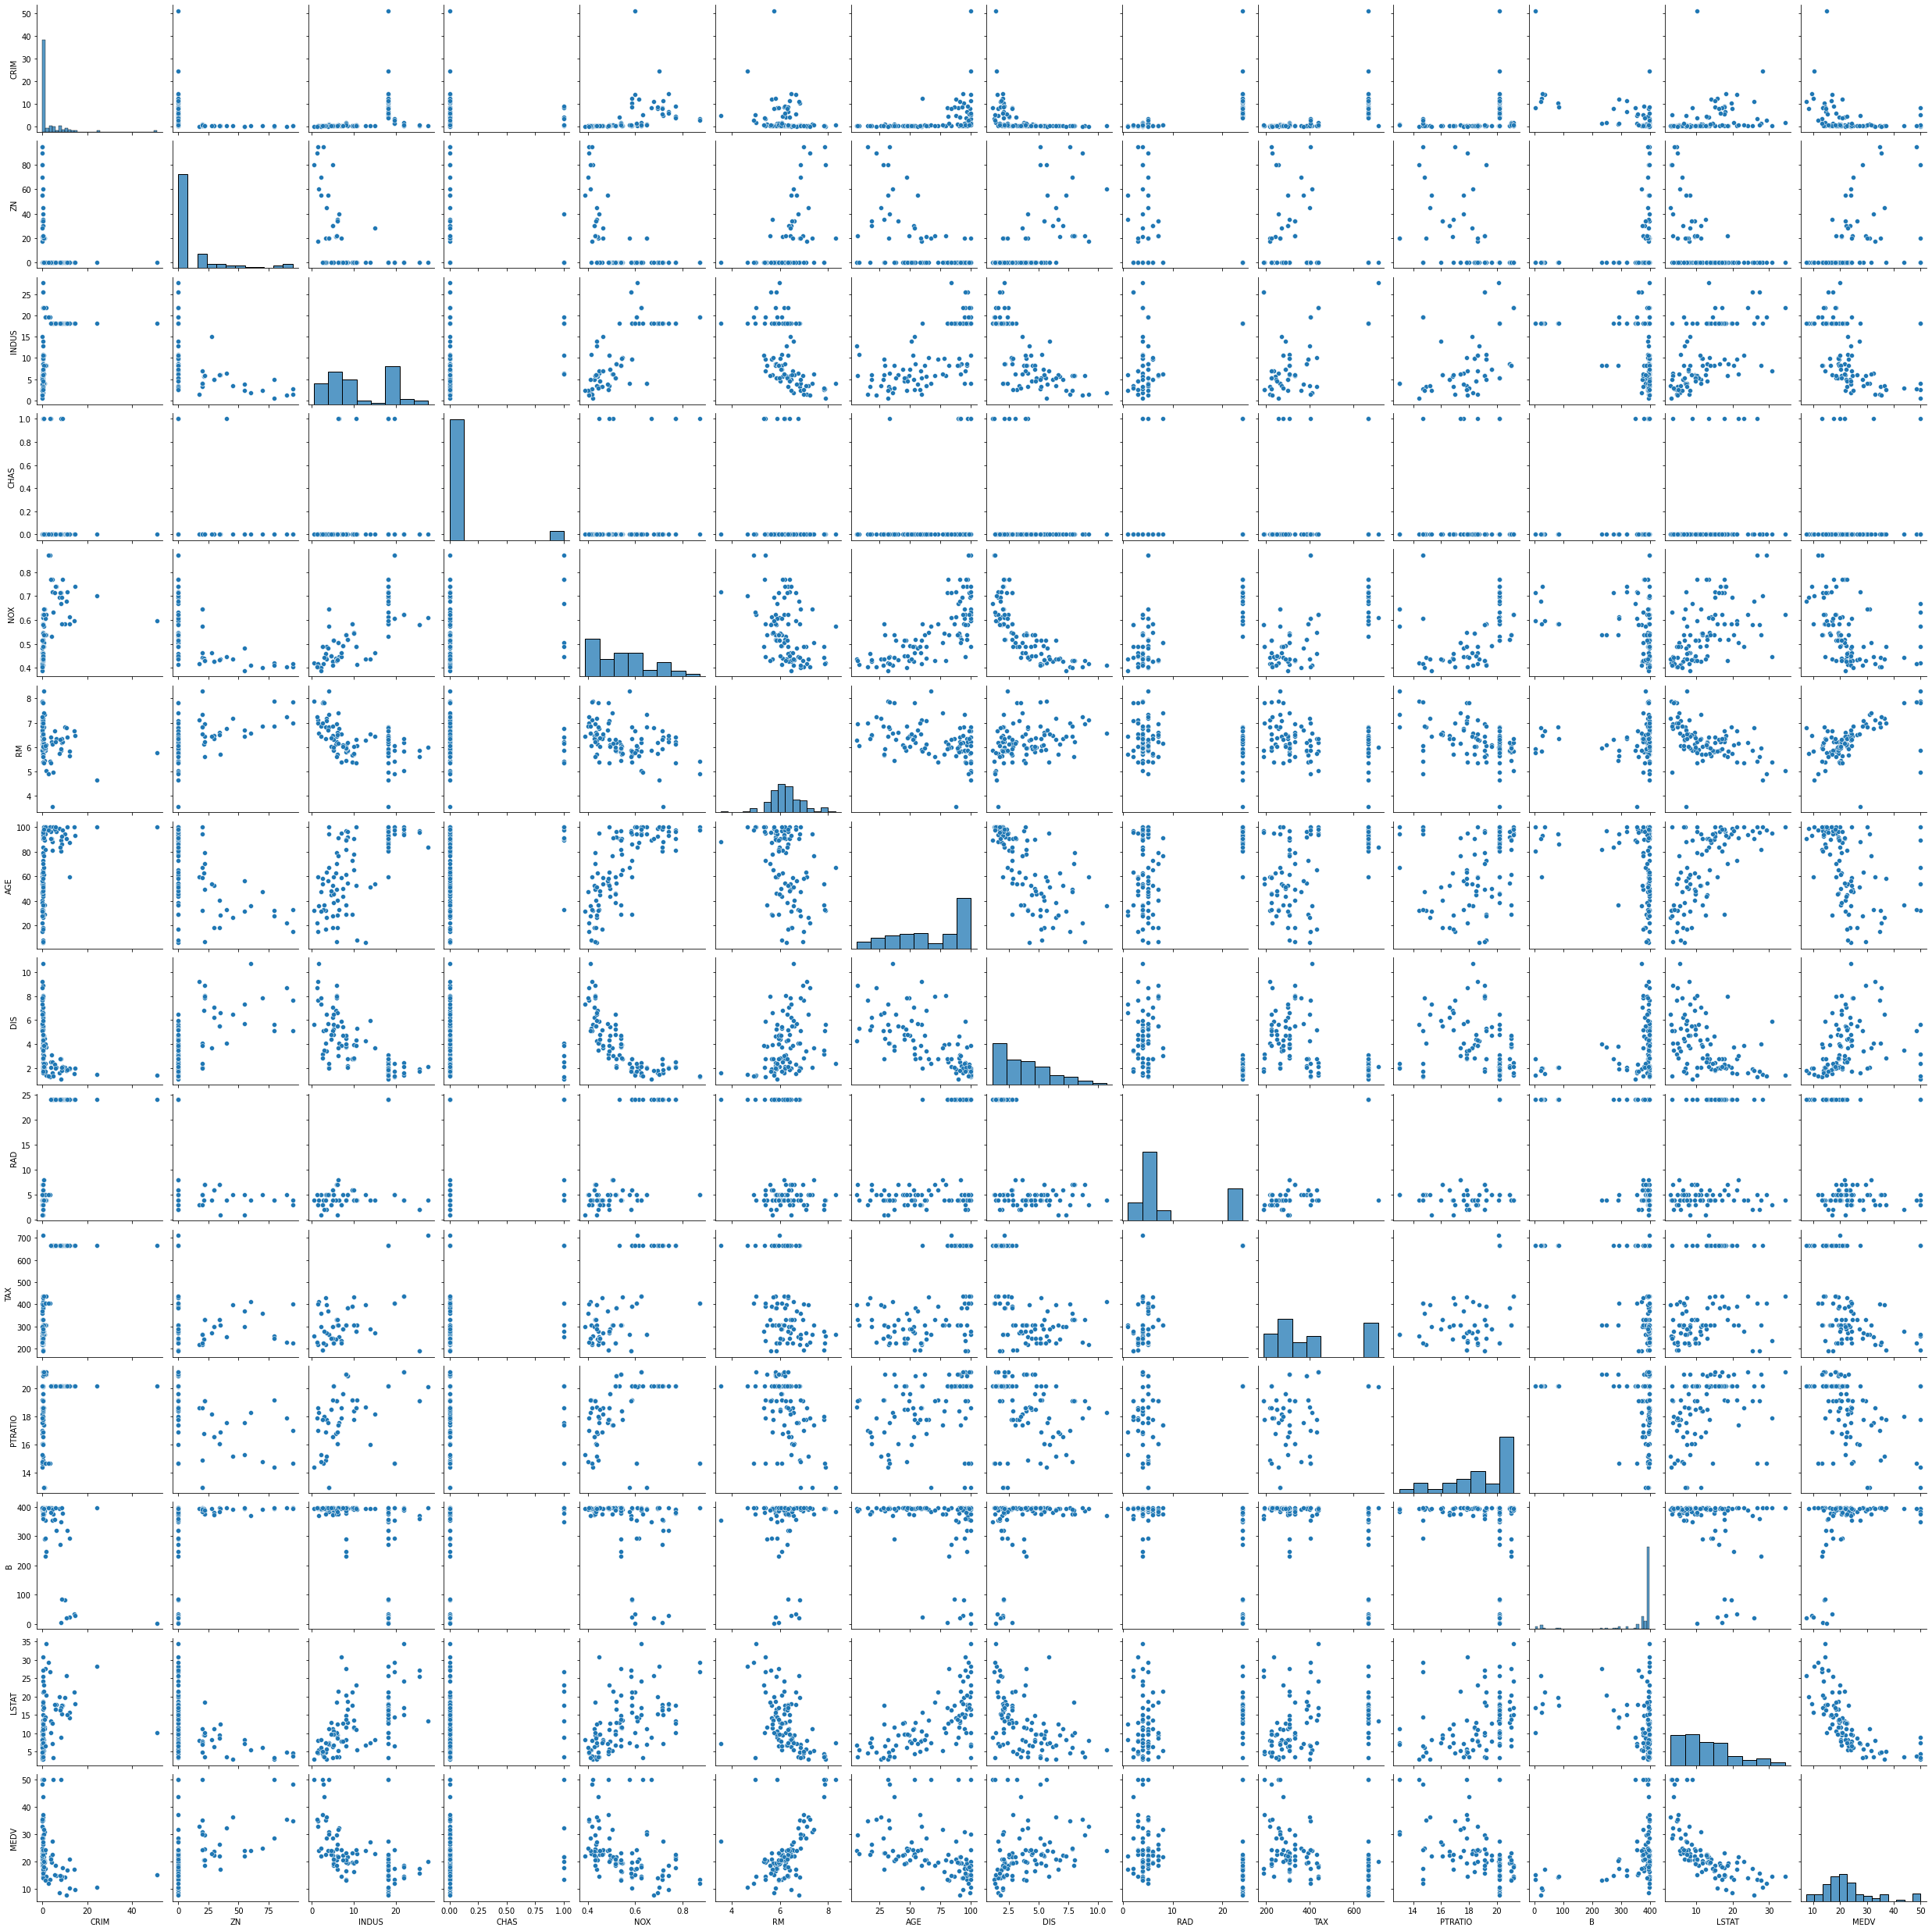

In [ ]:
sns.pairplot(data = df.sample(100))

#### **데이터 전처리**


* 넘파이 배열로 변환

In [ ]:
# 넘파이 배열 변환
# 단순 X : RM y : MEDV
X = df['RM'].values
y = df['MEDV'].values
X.shape,Y.shape

# 모델 라이브러리에서의 암묵적인 룰
# 인풋 X는 2차 텐서 (행렬)
# 아웃풋 y는 1차 텐서 (벡터) / 단, 세개 이상 카테고리면 행렬
# X.shape = (506,1) , y.shape = (506,)

# 방법 1 : 넘파이 reshape
X = X.reshape(-1,1)

# 방법 2 : 넘파이 배열 변환시
X = df[ ['RM'] ].values
X.shape, y.shape

((506, 1), (506,))

* 데이터 분할 (테스트 비율 0.2)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1 )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 1), (102, 1), (404,), (102,))

* 스케일링 - 정규화 진행

In [ ]:
from sklearn.preprocessing import StandardScaler
# minmax / z-score
sc_x = StandardScaler() # X에 대한 정규화 mean, std가 정해지지 않음
sc_y = StandardScaler() # y에 대한 정규화 mean, std가 정해지지 않음
sc_x.fit(X_train) # 인풋 X_train에 대한 mean, std 정해주기
sc_y.fit(y_train.reshape(-1,1)) # 아웃풋 y_train에 대한 mean, std 정해주기
# fit 함수의 인풋은 2차 텐서

# sc_x 함수 : 데이터가 들어오면 x-maen_train / std_xtrain

StandardScaler()

* 훈련 데이터 정규화

In [ ]:
X_train = sc_x.fit_transform(X_train) # 데이터 변환
y_train = sc_x.fit_transform(y_train.reshape(-1,1)).flatten() # 데이터 변환, flatten() : 1차원 배열로 나열해줌
X_train.shape, y_train.shape

((404, 1), (404,))

* 테스트 데이터 정규화

In [ ]:
X_test = sc_x.fit_transform(X_test) # 데이터 변환
y_test = sc_x.fit_transform(y_test.reshape(-1,1)).flatten() # 데이터 변환, flatten() : 1차원 배열로 나열해줌
X_test.shape, y_test.shape

((102, 1), (102,))

### **| 모델링**

#### **직접 만든 회귀 클래스 사용**

* 클래스 구현

In [ ]:
class LinearRegressionGD():
  def __init__(self, lr=0.001, random_state=1):
    self.lr=lr
    self.seed = np.random.RandomState(random_state)
  
  def init_weights(self, X):
    size = X.shape[1]
    self.w = self.seed.normal(0,0.01, size = size+1)

  def linear(self, X):
    return np.dot(X, self.w[:-1]) + self.w[-1] # w값들과 X의 내적 + bias의 값
  
  def predict(self, X):
    return self.linear(X)

  def loss(self, y, y_hat):
    return ((y-y_hat)**2)/2

  def evaluate(self, X, y):
    y_hat = self.linear(X)
    loss = self.loss(y,y_hat)
    loss = loss.sum()/len(y)
    return loss

  def fit(self, X, y, epochs=10, show_params=False):


    self.init_weights(X) # 가중치 초기화
    self.history=dict(loss=[]) # history 초기화

    for epoch in range(epochs):    
      
      # 최적화
      for xi,yi in zip(X,y) :
        y_hat = self.linear(xi)
        self.w[:-1] += self.lr*(yi-y_hat)*xi
        self.w[-1] += self.lr*(yi-y_hat)  # bias(b) 값

      
      # 평가 및 결과 저장
      loss = self.evaluate(X, y)
      self.history['loss'].append(loss)
      print(f'[Epoch {epoch}] loss: {np.round(loss,2)}  ')
      if show_params: print(self.w)

  # 데이터 흐름 시각화
  def draw_dflow(self, X, y, title='', figsize=(8,4)):
    plt.figure(figsize=figsize)
    plt.title(title)
    
    y_hat = self.linear(X)
    plt.plot(y, label='y', marker='o')
    plt.plot(y_hat, label='$\hat{y}$', marker='.', linestyle='--')
    plt.legend()
    plt.show()

  # 학습 곡선 시각화
  def draw_lcurve(self, title='', figsize=(8,4)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(self.history['loss'], label='loss', marker='o')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

* 모델 로드 및 학습

In [ ]:
model = LinearRegressionGD()
model.fit(X_train, y_train, 10)

[Epoch 0] loss: 0.37  
[Epoch 1] loss: 0.32  
[Epoch 2] loss: 0.29  
[Epoch 3] loss: 0.28  
[Epoch 4] loss: 0.28  
[Epoch 5] loss: 0.28  
[Epoch 6] loss: 0.28  
[Epoch 7] loss: 0.28  
[Epoch 8] loss: 0.27  
[Epoch 9] loss: 0.27  


* 학습곡선 그리기

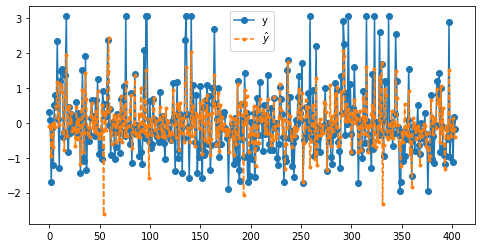

In [ ]:
model.draw_dflow(X_train, y_train)

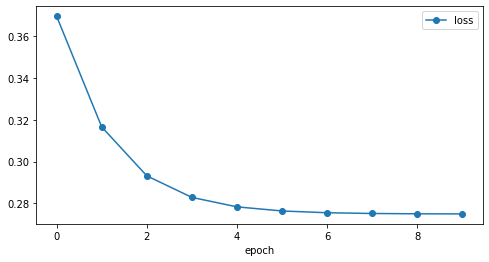

In [ ]:
model.draw_lcurve()

* 값 비교

* 기울기와 절편 구하기

\begin{align}
\hat{y} = wx+b
\end{align}

In [ ]:
w = model.w[0]
b = model.w[-1]
print(f'기울기 : {w:.3f}')
print(f'절편 : {b:.3f}')

기울기 : 0.664
절편 : 0.001


* 회귀선 시각화

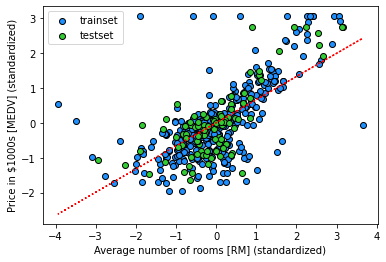

In [ ]:
plt.scatter(X_train, y_train, label= 'trainset', c='dodgerblue', edgecolor='k')
plt.scatter(X_test, y_test, label= 'testset', c='limegreen', edgecolor='k')
plt.plot(X_train,0.664*X_train, color='r', linestyle=':')  
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.legend()
plt.show()

#### **사이킷런으로 추정**

* 모델 로드 및 학습

In [ ]:
from sklearn.linear_model import *
linear = LinearRegression() # 모델 클래스 가져오기
linear.fit(X_train, y_train) # 학습

LinearRegression()

* 기울기와 절편 구하기

\begin{align}
\hat{y} = wx+b
\end{align}

In [ ]:
w = linear.coef_[0] # 계수 = 가중치
b = linear.intercept_ # 절편 = 편향(bias)

print(f'기울기 : {w}')
print(f'절편 : {b:.3f}')

기울기 : 0.6709633342696334
절편 : 0.000


* 회귀선 시각화

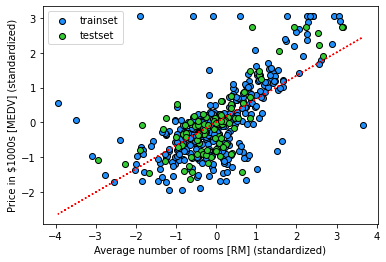

In [ ]:
plt.scatter(X_train, y_train, label= 'trainset', c='dodgerblue', edgecolor='k')
plt.scatter(X_test, y_test, label= 'testset', c='limegreen', edgecolor='k')
plt.plot(X_train,w*X_train, color='r', linestyle=':')  
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.legend()
plt.show()

#### **RANSAC을 사용한 안정된 회귀모델 훈련**

- RANSAC (RANdom SAmple Consensus)
- 이상치를 효율적으로 다루는 알고리즘
- 이상치를 제거하는 대신 정상치(inlier) 라는 일부 데이터로 회귀 모델을 훈련

```
1. 랜덤하게 일부 샘플을 정상치로 선택하여 모델 훈련
2. 훈련된 모델에서 다른 모든 포인트를 테스트하여 사용자가 입력한 허용 오차 안에 속한 포인트를 정상치에 추가
3. 모든 정상치를 사용하여 모델을 재훈련
4. 훈련된 모델과 정상치 간의 오차 추정
5. 성능이 사용자가 지정한 임계 값에 도달하거나 지정된 반복 횟수에 도달하면 알고리즘 종료
```

* 모델 로드 및 훈련

In [ ]:
ransac = RANSACRegressor( LinearRegression(), # 사용할 모델
                         max_trials = 100,   # 최대 반복 횟수
                         min_samples = 50,   # 랜덤하게 선택할 샘플의 최소 개수
                         loss = 'squared_error', # 오차제곱 {absolute_error}
                         random_state = 1
                         )    
ransac.fit(X_train, y_train)                    

RANSACRegressor(base_estimator=LinearRegression(), loss='squared_error',
                min_samples=50, random_state=1)

* 학습 파라미터 확인

In [ ]:
w = ransac.estimator_.coef_[0] # 계수 = 가중치
b = ransac.estimator_.intercept_ # 절편 = 편향(bias)

print(f'기울기 : {w:.3f}')
print(f'절편 : {b:.3f}')

기울기 : 0.708
절편 : 0.041


In [ ]:
y_linear_pred = linear.predict(X_test)
y_ransac_pred = ransac.predict(X_test)

print(np.mean( (y_test - y_linear_pred)**2 ))
print(np.mean( (y_test - y_ransac_pred)**2 ))

0.4059098934088812
0.4009519683352657


* 정상치와 이상치 구분

In [ ]:
inlier_mask = ransac.inlier_mask_ # 정상치 데이터 마스크
outlier_mask = np.logical_not(inlier_mask) # 이상치 데이터 마스크
inlier_mask.shape, outlier_mask.shape

((404,), (404,))

* 정상치와 이상치 데이터 시각화

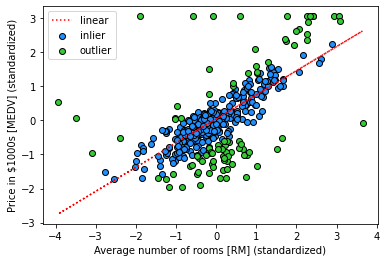

In [ ]:
plt.scatter(X_train[inlier_mask], y_train[inlier_mask], label= 'inlier', c='dodgerblue', edgecolor='k')
plt.scatter(X_train[outlier_mask], y_train[outlier_mask], label= 'outlier', c='limegreen', edgecolor='k')
plt.plot(X_train, ransac.predict(X_train), color='r', linestyle=':', label = 'linear')  
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.legend()
plt.show()

### **| 회귀 성능 지표**

* 성능지표 함수 임포트

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

* 성능 확인을 위한 y 예측값 불러오기

In [ ]:
y_test.shape, y_linear_pred.shape

((102,), (102,))

#### **MSE (Mean Squared Error, 평균 제곱 오차)**

\begin{split}
\frac{1}{n} \sum^n_{i=1}(y_i - \hat{y_i})^2
\end{split}

In [ ]:
mean_squared_error(y_test, y_linear_pred)

0.4059098934088812

#### **RMSE (Root Mean Squared Error, 제곱근 평균 제곱 오차)**

\begin{split}
\sqrt{\frac{1}{n} \sum^n_{i=1}(y_i - \hat{y_i})^2}
\end{split}

In [ ]:
np.sqrt(mean_squared_error(y_test, y_linear_pred))

0.6371105817743739

#### **MAE (Mean Absolute Error, 평균 절대 오차)**

\begin{split}
\frac{1}{n} \sum^n_{i=1}|y_i - \hat{y_i}|
\end{split}

In [ ]:
mean_absolute_error(y_test, y_linear_pred)

0.4793490542043092

#### **NMAE (Noramlized Mean Absolute Error, 정규화된 평균 절대 오차)**

\begin{split}
\frac{MAE}{\frac{1}{n} \sum^n_{i=1}|y_i|} 
\end{split}

In [ ]:
mean_absolute_error(y_test, y_linear_pred)/ np.mean( np.abs(y_test) )

0.6890648265839221

#### **MAPE (Mean Absolute Percentage Error, 평균 절대 백분율 오차)**

\begin{split}
\frac{1}{n} \sum^n_{i=1} |\frac{y_i-\hat{y_i}}{y_i}| × 100 \
\end{split}

In [ ]:
np.mean( np.abs((y_test - y_ransac_pred) / y_test) ) *100

246.1439998490253

#### **ESS (Explained sum of squares)**

\begin{split}
\sum^n_{i=1} (\hat{y_i}-\bar{y})^2
\end{split}


In [ ]:
ESS = np.sum(  (y_linear_pred-np.mean(y_test))**2  )

#### **RSS(Residual sum of squares)**

\begin{split}
\sum^n_{i=1} (y_i-\hat{y_i})^2
\end{split}

In [ ]:
RSS = np.sum( ( y_test - y_linear_pred )**2 )

#### **SST(Total sum of squares)**

\begin{split}
\sum^n_{i=1} (y_i-\bar{y_i})^2
\end{split}

In [ ]:
# train 셋으로 실행

y_linear_pred = linear.predict(X_train)
y_ransac_pred = ransac.predict(X_train)

ESS = np.sum(  (y_linear_pred-np.mean(y_train))**2  )
RSS = np.sum( ( y_train - y_linear_pred )**2 )
# RSS = np.sum( ( y_train - y_ransac_pred )**2 )

TSS = np.sum( ( y_train - np.mean(y_train) )**2 )
print(ESS + RSS,TSS)

404.0000000000001 404.0000000000001


In [ ]:
# test셋으로 실행

y_linear_pred = linear.predict(X_test)
y_ransac_pred = ransac.predict(X_test)

ESS = np.sum(  (y_linear_pred-np.mean(y_test))**2  )
RSS = np.sum( ( y_test - y_linear_pred )**2 )
TSS = np.sum( ( y_test - np.mean(y_train) )**2 )
print(ESS + RSS,TSS)

87.32237231299669 101.99999999999999


#### **결정계수 $R^2$**
* $R^2$ 범위: 0과 1사이 존재 (값이 1에 가까울수록 성능이 좋다)
* $R^2 = 1$: 현재 가지고 있는 x 변수로 y를 100% 설명 가능. 모든 관측치가 회귀선 위에 존재
* $R^2=0$: 현재 가지고 있는 x 변수로 y를 전혀 설명 할 수 없다. 

\begin{split}
R^2 = \frac{SSR}{SST} = 1-\frac{SSE}{SST}
\end{split}

In [ ]:
r2_score(y_test, y_linear_pred)

0.5940901065911188

* 함수 정리

In [ ]:
def regression_scores(y_true, y_pred) :
  MSE = mean_squared_error(y_true, y_pred)
  RMSE = np.sqrt(mean_squared_error(y_true,y_pred))
  MAE = np.mean( np.abs((y_test - y_ransac_pred) / y_test) )
  NMAE =mean_absolute_error(y_test, y_linear_pred)/ np.mean( np.abs(y_test) )
  MAPE = np.mean( np.abs((y_true - y_pred) / y_true) ) *100
  R2 = r2_score(y_true, y_pred)
  return {'MSE' : np.round(MSE, 3), 
          'RMSE' : np.round(RMSE, 3),
          'MAE' : np.round(MAE, 3),
          'NMAE' : np.round(NMAE, 3),
          'MAPE' : np.round(MAPE, 3),
          'R2' : np.round(R2, 3)}



def housing_loader(cols=[], norm=True):
  from sklearn.preprocessing import StandardScaler
  from sklearn.model_selection import train_test_split
  import warnings
  warnings.filterwarnings('ignore')
  df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

  df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
                'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
  print(df.shape)

  if cols:
    X = df[cols].values
  else:
    X = df.drop(['MEDV'], axis=1)
  y = df['MEDV'].values

  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

  if norm:
    sc_x = StandardScaler()
    sc_y = StandardScaler()
    sc_x.fit(X_train)
    sc_y.fit( np.expand_dims(y_train, 1) )

    X_train = sc_x.fit_transform(X_train)
    y_train = sc_y.fit_transform( np.expand_dims(y_train, 1) ).flatten()
    X_test = sc_x.fit_transform(X_test)
    y_test = sc_y.fit_transform( np.expand_dims(y_test, 1) ).flatten()
  
  return X_train, X_test, y_train, y_test
  

* 함수 사용하고 데이터프레임으로 나타내기

In [ ]:
X_train, X_test, y_train, y_test = housing_loader(['RM'])
regression_scores(y_train,linear.predict(X_train))

(506, 14)


{'MAE': 2.461,
 'MAPE': 234.515,
 'MSE': 0.55,
 'NMAE': 0.689,
 'R2': 0.45,
 'RMSE': 0.741}

## 다중 회귀 분석
---

### **| 데이터 전처리**

* 넘파이 배열로 변환

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/script')
sys.path.append('/content/drive/MyDrive/script')
from Data_loader import *
from Scores import *


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_train, X_test, y_train, y_test = housing_loader()

(506, 14)


* 데이터 분할 (테스트 비율 0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

* 스케일링 - 정규화 진행

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

sc_x.fit(X_train)
sc_y.fit( np.expand_dims(y_train, 1) )

StandardScaler()

* 훈련 데이터 정규화

In [ ]:
X_train = sc_x.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
print(X_train.shape, y_train.shape)

(404, 13) (404,)


* 테스트 데이터 정규화

In [ ]:
X_test = sc_x.transform(X_test)
y_test = sc_y.transform(y_test[:, np.newaxis]).flatten()
print(X_test.shape, y_test.shape)

(102, 13) (102,)


### **| 모델링**

* 여러가지 회귀 모델을 사용하여 회귀 분석 진행

#### **Linear regression**


\begin{split}
\min_{w} || X w - y||_2^2
\end{split}

In [ ]:
from sklearn.linear_model import *
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

#### **Ridge regression**


\begin{split}
\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2
\end{split}

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

#### **Lasso regression**

\begin{split}
\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}
\end{split}


In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

#### **Elastic Net**


\begin{split}
\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
\frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}
\end{split}


In [ ]:
elastic = ElasticNet(alpha=0.1)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.1)

#### **Bayesian Ridge Regression**


\begin{split}
p(w|\lambda) =
\mathcal{N}(w|0,\lambda^{-1}\mathbf{I}_{p})
\end{split}

In [ ]:
bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train, y_train)

BayesianRidge()

### **| 성능 비교**

* `regression_scores` 이용한 회귀 모델 성능 비교

In [ ]:
df_score = pd.DataFrame()
for model in ['linear', 'ridge', 'lasso', 'elastic', 'bayes_ridge']:
  y_pred = eval(model).predict(X_test)
  df_score = pd.concat([df_score, pd.DataFrame(regression_scores(y_test, y_pred) ,index=[model]) ])
df_score.style.background_gradient(cmap='Greens_r')

,MSE,RMSE,MAE,NMAE,MAPE,R2
linear,0.222000,0.471000,5.791000,0.521000,579.145000,0.778000
ridge,0.222000,0.471000,5.794000,0.520000,579.405000,0.778000
lasso,0.315000,0.561000,5.492000,0.606000,549.237000,0.685000
elastic,0.280000,0.529000,5.837000,0.573000,583.659000,0.720000
bayes_ridge,0.220000,0.469000,5.904000,0.516000,590.402000,0.780000


* 실제값과 예측값의 산점도 그리기

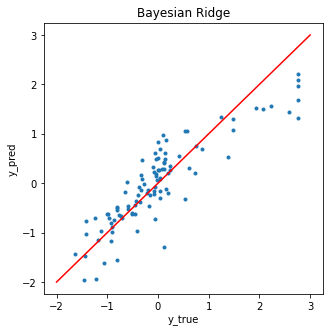

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Bayesian Ridge')

y_pred = bayes_ridge.predict(X_test)
plt.scatter(y_test, y_pred, marker='.')
plt.plot([-2,3],[-2,3], c='r')
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.show()